# INTRODUCTION

In this Data Story there will be an investigation on if there is a relationship between the Human Development Index (HDI) and the Gender Sucide ratio. The HDI is an internationally used index to measure the quality of life of a person in a certain country. The quality of life can be described simply as how livable a country is for an average person living in a country. Variables of this index are, among other things, life expectancy, education, healthcare and gross national income per capita. Men commit on average 3,9 times more suicide than women worldwide, but this varies per country. We are specifically interested if a higher HDI leads to a more evenly distributed gender suicide ratio. We will also take a look at the Gender Development Index (GDI). The GDI measures the index of the equality between the HDI for men and women. So if the HDI for men and women is almost equal, then the GDI is close to 1. With this extra variable, we can also look if the GDI has a effect on the gender suicide ratio. This data story will explore two different perspectives.

- The first perspective is that an increase of the HDI will lead to a decrease of average suicides per country. 
- The second is that an increase in the HDI doesn't have any influence on the gender suicide ratio, but that it is rather influenced by the GDI. An increase of the GDI will lead to an increase of average suicides per country.

With this Data Story, we hope to get a better insight in the relation between the development of a country, the development of gender and the suicide ratio.

# Preprocessing


Database 1 contains information about suicides in each country, as for men and women for every year between 1987 and 2016.  It would seem logical to filter for the year 2015, since this year is used in the other databases. However, the registered amount of countries for that year is only 62, which is why we have chosen to compare for the year 2013, which has 80 registered countries. The data that we are interested in (suicides/100k civilians) is categorized in a certain age group, year, and country. Male and female suicides are also separated. Based on these qualifications, two separate datasets are constructed, one male, and one female. The mean suicides/100k is then calculated for both datasets, and added as a column. Then, the male and female datasets are merged together into one, also including a male-female suicide ratio (suicides/100k male / suicides/100k female).

Database 2 contains data of 185 countries, revolved around the Human Development Index (HDI)  of each country, measured in 2015 specifically. The HDI is a value between 0 and 1 (low-high) that indicates human development by looking at health, education, and standard of living. The database contains each variable that is considered for the HDI value, but we are only interested in the HDI values themselves. Thus, as for preprocessing, all columns except the country and its HDI value are removed.

Database 3 is in terms of data-context identical to the first one, yet it revolves around the Gender Development Index (GDI), instead of the HDI. The GDI is also a value between 0 and 1 (low-high), that indicates equality in human development specifically between male and female. To clarify, the higher the gender equality, the higher the GDI value will be. Similarly to the preprocessing of database one, will all rows except the country and its GDI value be removed. Finally, dataset 2 and 3 are merged together based on their shared countries. Rows that include one or more ‘empty’ values are removed from the dataset.

Database 4 contains the HDI values for 189 countries for each year from 1990 to 2019. As we are interested specifically in the HDI values for each country from the year 2013 (based on the argumentation above in dataset 1, all other years are filtered out. This database is then merged with database 2 to form a separate dataset. This dataset will be used to prove why the HDI values of 2015 can be compared with the suicide statistics of 2013, as the difference between the HDI values of 2013 and 2015 are insignificant. 

Datasets 1-4 are finally merged into one based on their shared country, which results in a dataset with 70 countries.



 # GENDER PERSPECTIVE
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('databases/Age-standardized suicide rates.csv')
df1 = pd.read_csv('databases/IV DATASET 1.csv')
df1 = df1[['Country', 'GDI 2015', 'HDI 2015']]
df = pd.merge(df, df1, on='Country')

df['Sex'] = df['Sex'].str.replace('female', 'F').str.replace('male', 'M')

female_suicides = df[df['Sex'].str.contains('fem', case=False)]
male_suicides = df[df['Sex'].str.contains('male', case=False)]

female_suicides_2015 = female_suicides[['Country', '2015', 'GDI 2015', 'HDI 2015']]
male_suicides_2015 = male_suicides[['Country', '2015', 'GDI 2015', 'HDI 2015']]

# Merge female and male datasets on Country
merged_data = pd.merge(female_suicides_2015, male_suicides_2015, on='Country', suffixes=('_Female', '_Male'))

# Select the relevant columns for HDI, GDI, and suicide rates
data = merged_data[['Country', 'HDI 2015_Female', 'HDI 2015_Male', 'GDI 2015_Female', 'GDI 2015_Male', '2015_Female', '2015_Male']]

# Calculate trendlines for HDI (female and male)
z_hdi_female = np.polyfit(data['HDI 2015_Female'], data['2015_Female'], 1)
p_hdi_female = np.poly1d(z_hdi_female)

z_hdi_male = np.polyfit(data['HDI 2015_Male'], data['2015_Male'], 1)
p_hdi_male = np.poly1d(z_hdi_male)

# Calculate trendlines for GDI (female and male)
z_gdi_female = np.polyfit(data['GDI 2015_Female'], data['2015_Female'], 1)
p_gdi_female = np.poly1d(z_gdi_female)

z_gdi_male = np.polyfit(data['GDI 2015_Male'], data['2015_Male'], 1)
p_gdi_male = np.poly1d(z_gdi_male)

# Create subplots for GDI and HDI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for GDI
ax1.scatter(data['GDI 2015_Female'], data['2015_Female'], c='red', label='Female')
ax1.scatter(data['GDI 2015_Male'], data['2015_Male'], c='blue', label='Male')

# Plot trendlines for GDI
gdi_range = np.linspace(data['GDI 2015_Female'].min(), data['GDI 2015_Female'].max(), 100)
ax1.plot(gdi_range, p_gdi_female(gdi_range), 'r--', label='Female Trend')
ax1.plot(gdi_range, p_gdi_male(gdi_range), 'b--', label='Male Trend')

ax1.set_xlabel('GDI 2015')
ax1.set_ylabel('Suicide Rate (2015)')
ax1.set_title('Relationship between GDI and Suicide Rate')
ax1.legend()

# Plot for HDI
ax2.scatter(data['HDI 2015_Female'], data['2015_Female'], c='red', label='Female')
ax2.scatter(data['HDI 2015_Male'], data['2015_Male'], c='blue', label='Male')

# Plot trendlines for HDI
hdi_range = np.linspace(data['HDI 2015_Female'].min(), data['HDI 2015_Female'].max(), 100)
ax2.plot(hdi_range, p_hdi_female(hdi_range), 'r--', label='Female Trend')
ax2.plot(hdi_range, p_hdi_male(hdi_range), 'b--', label='Male Trend')

ax2.set_xlabel('HDI 2015')
ax2.set_ylabel('Suicide Rate (2015)')
ax2.set_title('Relationship between HDI and Suicide Rate')
ax2.legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'databases/Age-standardized suicide rates.csv'

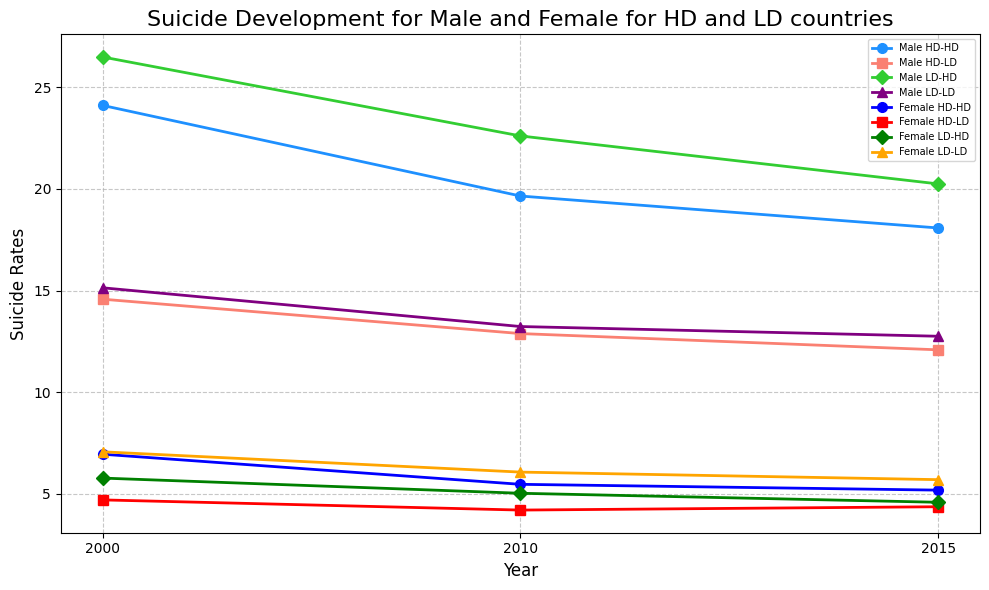

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
males = pd.read_csv('databases/male_suicides.csv')
females = pd.read_csv('databases/female_suicides.csv')

males['HDI Classification'] = males['HDI 2015'].apply(lambda x: 'HD' if x >= 0.85 else 'LD')
females['HDI Classification'] = females['HDI 2015'].apply(lambda x: 'HD' if x >= 0.85 else 'LD')
males['GDI Classification'] = males['GDI 2015'].apply(lambda x: 'HD' if x >= 0.97 else 'LD')
females['GDI Classification'] = females['GDI 2015'].apply(lambda x: 'HD' if x >= 0.97 else 'LD')

# Group the data by HDI and GDI classifications for males
hh_df_m = males[(males['HDI Classification'] == 'HD') & (males['GDI Classification'] == 'HD')]
hl_df_m = males[(males['HDI Classification'] == 'HD') & (males['GDI Classification'] == 'LD')]
lh_df_m = males[(males['HDI Classification'] == 'LD') & (males['GDI Classification'] == 'HD')]
ll_df_m = males[(males['HDI Classification'] == 'LD') & (males['GDI Classification'] == 'LD')]

# Group the data by HDI and GDI classifications for females
hh_df_f = females[(females['HDI Classification'] == 'HD') & (females['GDI Classification'] == 'HD')]
hl_df_f = females[(females['HDI Classification'] == 'HD') & (females['GDI Classification'] == 'LD')]
lh_df_f = females[(females['HDI Classification'] == 'LD') & (females['GDI Classification'] == 'HD')]
ll_df_f = females[(females['HDI Classification'] == 'LD') & (females['GDI Classification'] == 'LD')]

# Extract the necessary columns for plotting
years = ['2000', '2010', '2015']
male_hh = hh_df_m[years].mean()
male_hl = hl_df_m[years].mean()
male_lh = lh_df_m[years].mean()
male_ll = ll_df_m[years].mean()
female_hh = hh_df_f[years].mean()
female_hl = hl_df_f[years].mean()
female_lh = lh_df_f[years].mean()
female_ll = ll_df_f[years].mean()

# Define color and marker styles
colors = ['dodgerblue', 'salmon', 'limegreen', 'purple', 'blue', 'red', 'green', 'orange']
markers = ['o', 's', 'D', '^', 'o', 's', 'D', '^']
labels = ['Male HD-HD', 'Male HD-LD', 'Male LD-HD', 'Male LD-LD', 'Female HD-HD', 'Female HD-LD', 'Female LD-HD', 'Female LD-LD']

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
for i, data in enumerate([male_hh, male_hl, male_lh, male_ll, female_hh, female_hl, female_lh, female_ll]):
    plt.plot(years, data, color=colors[i], marker=markers[i], linewidth=2, markersize=7)

# Set plot title and labels
plt.title('Suicide Development for Male and Female for HD and LD countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicide Rates', fontsize=12)

# Customize ticks and gridlines
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(labels, loc='upper right', fontsize=7)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


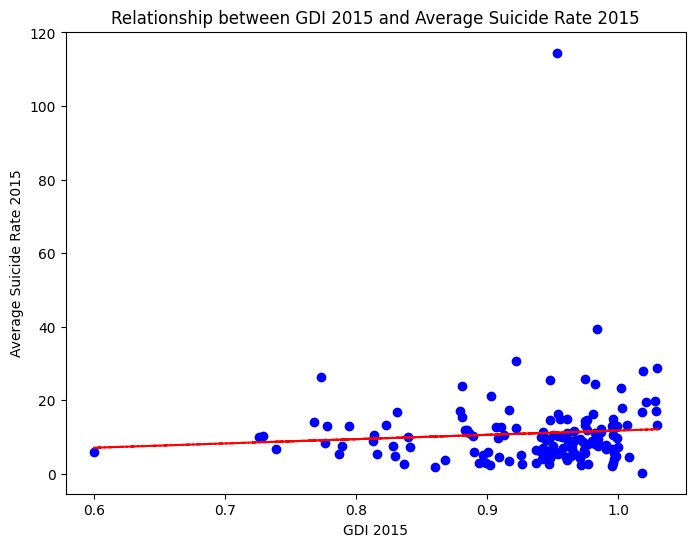

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('databases/IV DATASET 1.csv')

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['GDI 2015'], df['Average suicide 2015'], color='blue')

# Calculate trendline using linear regression
z = np.polyfit(df['GDI 2015'], df['Average suicide 2015'], 1)
p = np.poly1d(z)
plt.plot(df['GDI 2015'], p(df['GDI 2015']), color='red', linestyle='--')

# Add labels and title
plt.xlabel('GDI 2015')
plt.ylabel('Average Suicide Rate 2015')
plt.title('Relationship between GDI 2015 and Average Suicide Rate 2015')

# Display the plot
plt.show()




NameError: name 'mplcursors' is not defined

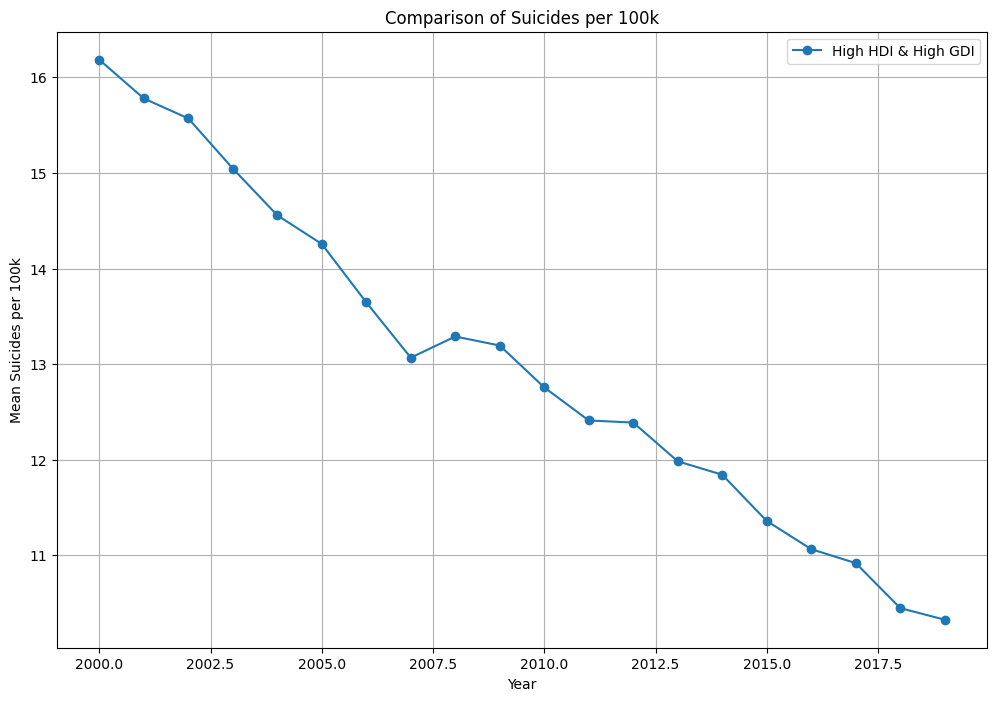

In [4]:

# Read the dataset
df = pd.read_csv('databases/IV DATASET 2.csv')
df1 = pd.read_csv('databases/IV DATASET 1.csv')

df1['HDI Classification'] = df1['HDI 2015'].apply(lambda x: 'HD' if x >= 0.775 else 'LD')
df1['GDI Classification'] = df1['GDI 2015'].apply(lambda x: 'HD' if x >= 0.97 else 'LD')

data = pd.merge(df, df1, on='Country')
data = data[['Country', 'Year', 'Suicides/100k', 'HDI Classification', 'GDI Classification']].dropna()

hh_df = data[(data['HDI Classification'] == 'HD') & (data['GDI Classification'] == 'HD')]
hl_df = data[(data['HDI Classification'] == 'HD') & (data['GDI Classification'] == 'LD')]
lh_df = data[(data['HDI Classification'] == 'LD') & (data['GDI Classification'] == 'HD')]
ll_df = data[(data['HDI Classification'] == 'LD') & (data['GDI Classification'] == 'LD')]

# Function to plot the line chart
def plot_line_chart(ax, data, category_name):
    years = data['Year'].unique()
    years.sort()
    suicides_mean = data.groupby('Year')['Suicides/100k'].mean()
    ax.plot(years, suicides_mean, marker='o', label=category_name)

    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Suicides per 100k')
    ax.set_title('Comparison of Suicides per 100k')
    ax.legend()
    ax.grid(True)

    # Enable interactivity and hover-over data labels
    cursor = mplcursors.cursor(ax, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f})"))

# Creating the subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the line charts for each category
plot_line_chart(ax, hh_df, 'High HDI & High GDI')
plot_line_chart(ax, hl_df, 'High HDI & Low GDI')
plot_line_chart(ax, lh_df, 'Low HDI & High GDI')
plot_line_chart(ax, ll_df, 'Low HDI & Low GDI')

# Adjusting x-axis tick spacing
ax.xaxis.set_major_locator(plt.MaxNLocator(len(ax.get_xticks()) // 2))

plt.show()
